In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import matplotlib as mpl

In [3]:
tsnedir = "../dataset/whole_mp_xy"

onlyfiles = [join(tsnedir, f) for f in listdir(tsnedir) if isfile(join(tsnedir, f))]
allmp_props = pd.read_csv("../dataset/all_mp_all_props.csv")
allmp_id = allmp_props.mp_id.to_frame()

/tmp/ipykernel_131517/101923836.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  allmp_props = pd.read_csv("../dataset/all_mp_all_props.csv")


In [4]:
features={}
for file in onlyfiles:
    decriptor = file.split('/')[-1].split('_')[1]
    print(decriptor)
    feat_xy   = pd.read_csv(file,index_col=None)
    prop_data = pd.merge(right=feat_xy, 
                left=allmp_props, 
                how='right', 
                right_on='mp_id', 
                left_on='mp_id')

    features[decriptor]=prop_data
    


pwdm100
topo
xrd
fcod0
comp
ccod0
gat


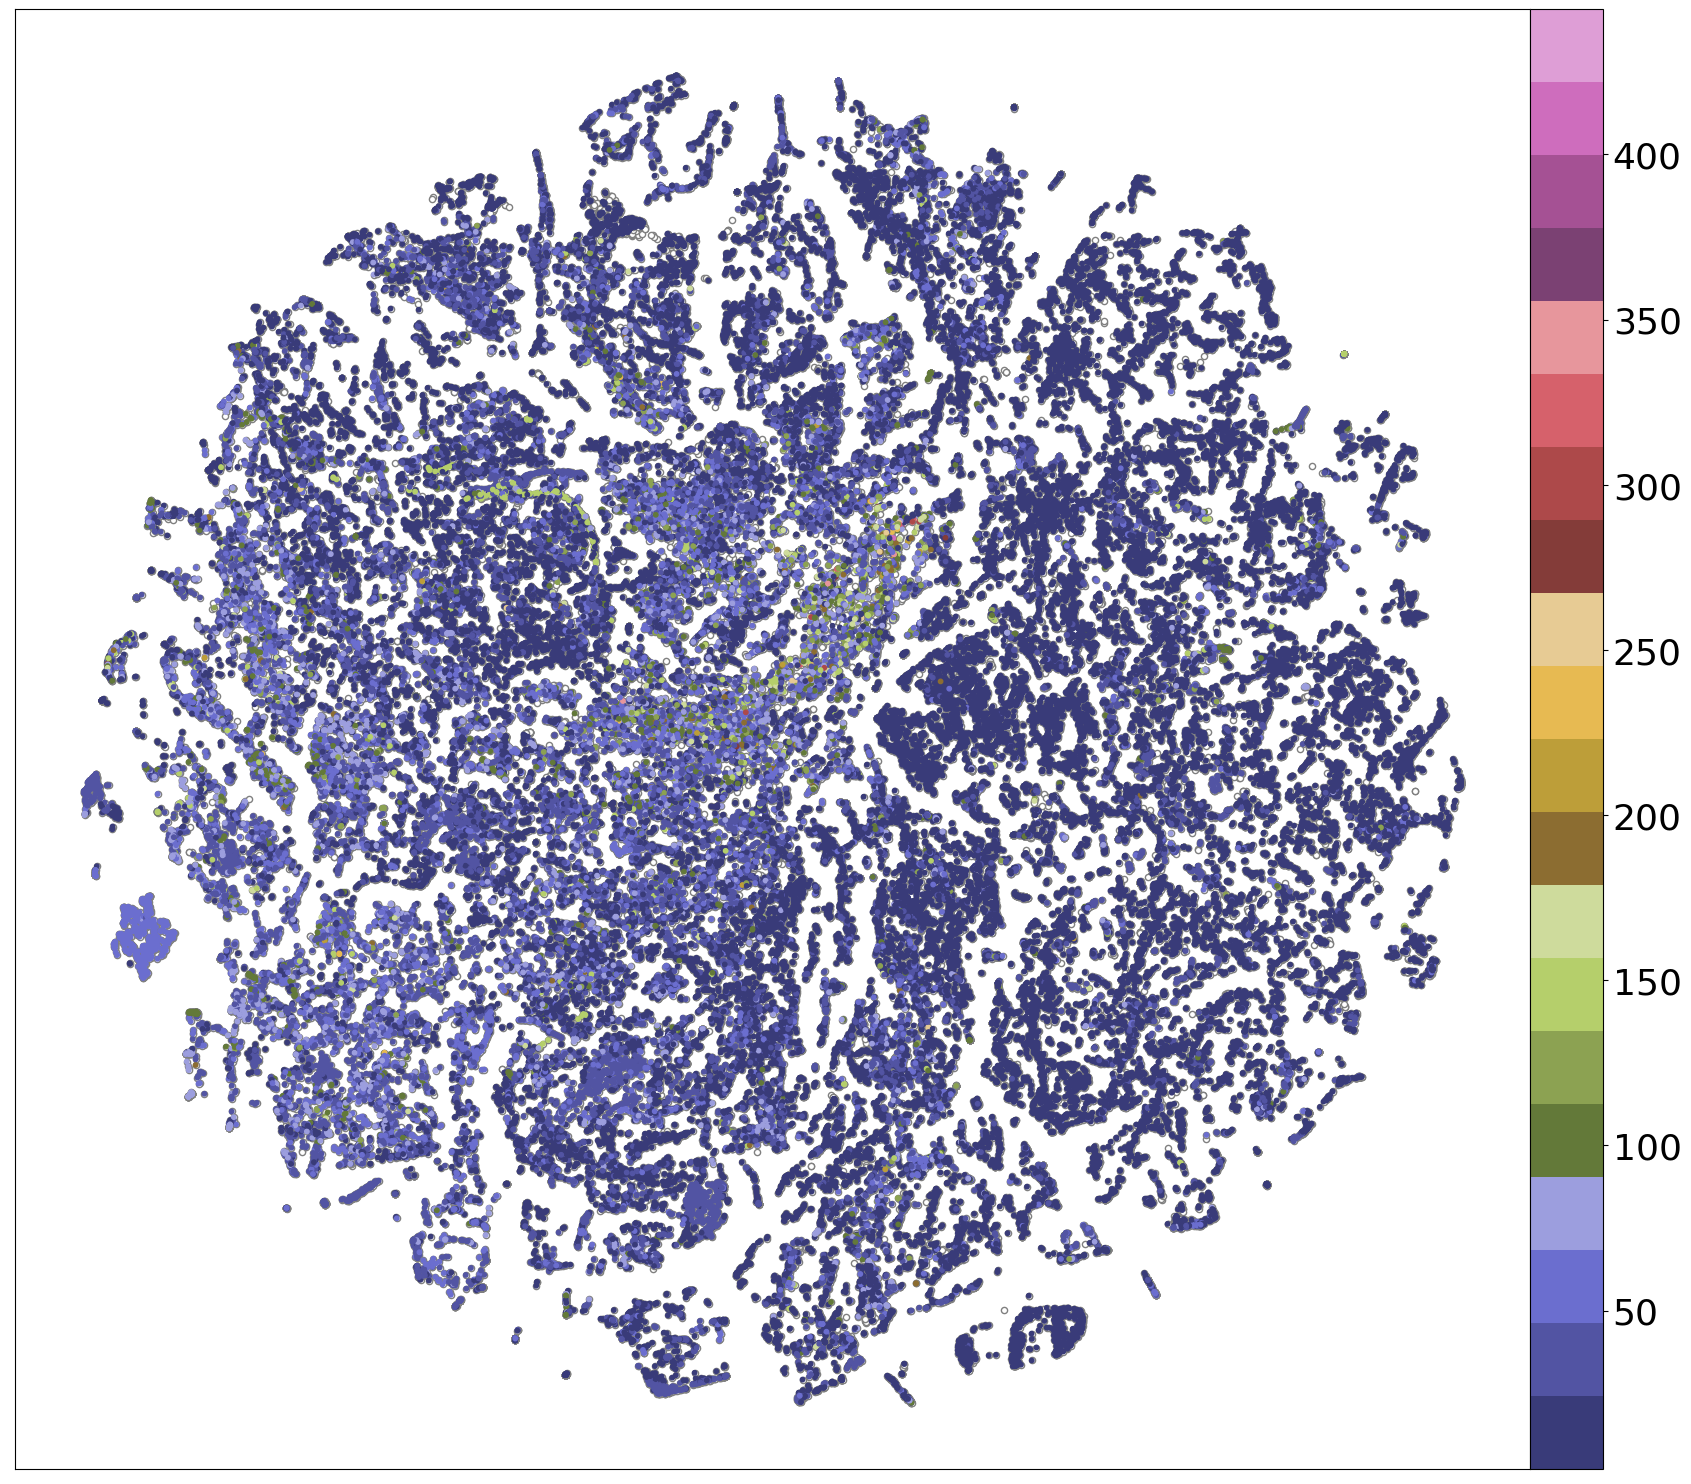

In [5]:
labelist = [
    'final_energy_per_atom',
            'final_energy', 
            'e_above_hull', 
            'spacegroup', 
            'Piezoelectric_Modulus', 
            'mass', 
            'Mean_Mass_Per_Atom', 
            'volume', 
            'density', 
            'nsites', 
            'band_gap', 
            'K_VRH', 
            'G_VRH', 
            'poisson_ratio', 
            'vol_per_atom', 
            'atomic_density', 
            'Interatomic_Spacing', 
            'young', 
            'shear', 
            'bulk', 
            'pugh', 
            'Lame', 
            'Pressure_Wave', 
            'Vickers', 
            'T_Sound_V', 
            'L_Sound_V', 
            'M_Sound_V', 
            'Gruneisen', 
            'debye', 
            'Thermal_Conductivity', 
            'Melting_Point', 
            'cystal_system']

for descriptor in features:
    #fig5 in paper used topo descriptor
    #descriptor = "topo"

    for label in labelist:
        plt.rcParams.update({'font.size': 26})
        fig = plt.figure(figsize=(23,20),dpi=100)
        ax1 = fig.add_subplot(111)
        x=features[descriptor].loc[:]['x']
        y=features[descriptor].loc[:]['y']
        plt.scatter(x,y,marker='o',color='white',s=20,zorder=1, edgecolor="grey")

        
    
        z=features[descriptor].loc[:][label]
        
        
        z_min, z_max = z.min(), z.max()
        #print(z_min, z_max)
        c = plt.scatter(x, y, c=z, s=10,zorder=3,cmap=mpl.colormaps['tab20b'], vmin=z_min, vmax=z_max)
        
        
        # set the limits of the plot to the limits of the data
        fig.colorbar(c, ax=ax1, pad=0)
        
        plt.subplots_adjust(left=None, bottom=0.15, right=None, top=None,
                        wspace=0.1, hspace=0.15)

        ax1.get_xaxis().set_visible(False)
        ax1.get_yaxis().set_visible(False)
        #plt.legend(labels = ['alldata'], loc='lower left')
        #plt.title(label)
        
        plt.xticks()
        plt.show()
        break
    break    
    #   You can pick the property and descriptor instead of running the entire loop